# Introduction and Overview

Big Mountain Resort (BMR) is a ski resort in Montana serving over 350K skiers and snowboarders of all skill levels each season. Recently, the resort installed a new chairlift, adding approximately \$1.5M in seasonal operating costs, to facilitate visitor distribution across the mountain. Now, to maximize their profits, BMR wants insight on the relative importance of their facilities to skiers so that they can capitalize on them accordingly. Using a dataset comprised of facilities information on 330 peer market share ski resorts across the United States, the BMR executive team is seeking data driven guidance on increasing profits by at least \\$1.5M by the start of next season either through ticket prices adjustments or by reducing cost ineffective facilities. The executives understand that not all changes to the facilities are possible or economical and that any analysis will be largely limited to the available fields and entries in the data provided. Assisting the executive team are Jimmy Blackburn (director of operations) and Alesha Eisen (database manager).


# Summary of Data Cleaning and Preparation

Provided with a dataset of 330 ski resorts, including BMR, across 35 U.S. states, the first key task was to understand the data and identify any issues. To make the dataset more conducive for analysis, obvious erroneous outliers were either excluded or replaced and we dropped the fasteight field, which contained scant information.  Furthermore, state area and population data scraped from Wikipedia [1] was used to supplement the original data.
We chose adult weekend ticket price as the target label, based on its relatively low missingness (15%) across all records compared to the adult weekday price (16%). Next, the set of features that would be useful in predicting the weekend price had to be selected. Combining PCA analysis with the average state ticket price, we find no significant effect of home state on price, obviating the need for any special location dependent analysis. Further EDA revealed strong correlations between the ticket price and the vertical drop, number of fast quad chairlifts, the total number of runs, snow making area, and the number of chairs at a ski resort as seen in the heatmap of correlations in the data (Figure 1). 


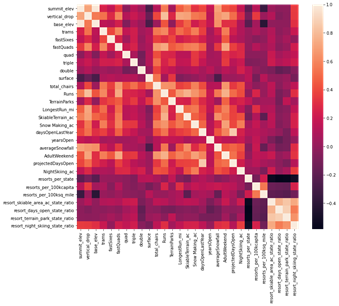
 <strong>Figure 1</strong>

# Selecting the Best Machine Learning Model

To determine the best model for predicting ticket price from a set of numerical features, we built a pipeline with the following steps:
1.	impute missing values with either the mean or median of the column values [2].
2.	Scale the data based on the standardization method assigning a mean of 0 and a standard deviation of unity [3].
3.	Select the k best features based on univariate statistical tests. [4,5]
4.	Applying the machine learning model (either linear regression or random forest)
With the BMR record removed, 70% of the data used for training the model. Additionally, cross-validation (k=5) was additionally employed to avoid overfitting the model to a particular test set.
Ultimately, the model with the lowest MAE was found to be a random forest model using median imputation and no scaling. Finally, using the learning_curve function [6], we determined the data set to be sufficiently large. 
 

# Assessing Scenarios to Increase Big Mountain Resort’s Profits

Using our best random forest model, we assessed four possible scenarios proposed by BMR executives in terms of profitability. 
1.	Permanently closing down up to 10 of the least used runs. 
2.	Increase the vertical drop by adding a run to a point 150 feet lower down but requiring the installation of an additional chair lift to bring skiers back up, without additional snow making coverage.
3.	Same as number 2, but adding 2 acres of snow making cover.
4.	Increase the longest run by 0.2 mile to boast 3.5 miles length, requiring an additional snow making coverage of 4 acres.
Scenario 4 had no effect on ticket price and thus can be eliminated from consideration. Scenario 1 resulted in a predicted decrease of \$1.81 for 10 runs but shows that not every subsequent elimination of a run affects price. 
Scenarios 2 and 3 both have a predicted increase of ticket price by \$1.99, but since scenario 3 costs more it is not considered. 


# How Can Big Mountain Resort Maximize Profits?

Our forest-based model predicts the adult weekend ticket price for Big Mountain Resort should be \$95.87 whereas the current price is only \$81.00. Even accounting for the mean absolute error of \$9.54 resulting from a five-fold cross-validation of our model, the prediction suggest that the resort can raise its ticket price at least to \\$85, generating \\$7M of increased revenue. Furthermore, scenario 2 suggested by BMR leadership would increase the predicted ticket price by \\$1.99, yielding \\$3.5M in additional revenue each year, more than making up for the additional \\$1.5M in operation costs incurred by adding another new chairlift.
BMR can also reduce operation costs by eliminating some of its least popular trails (scenario 1), although a more thorough cost-benefit analysis should be performed. Additional future work could focus on the possibility of adding at least one tram to the resort since BMR currently has none and tram number is reasonably correlated with ticket price and is an amenity that few other resorts offer (Figure 1).


# References

[1] https://simple.wikipedia.org/w/index.php?title=List_of_U.S._states&oldid=7168473 

[2] https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html 

[3] https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html 

[4] https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest 

[5] https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection 

[6] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html 
